READ ME

Group Members:Ryan McDonald, Justin Drouin

This jupyter notebook loads the StatLib boston dataset and uses machine learning linear regression in order to create a model to predict median home values based on the boston dataset and certain features. The notebook uses sci-kit learn to do linear regression using a degree-1 polynomial and a degree-2 polynomial along with MatplotLib to visualize the data.


**Experiments**


**1) Use the NumPy load() method to read the dataset. The data contains two arrays: 'features', which contains the variables CRIM through LSTAT, and 'target', which contains the variable MEDV.**

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.linear_model

with np.load('boston.npz') as data:
    features = data['features']
    target = data['target']

**2) Use sklearn.model_selection.train_test_split() to split the features and target values into separate training and test sets. Use 80% of the original data as a training set, and 20% for testing. To make sure that your results are reproducible, pass random_state=(2021-3-11).**

In [48]:
features_train, features_test, target_train, target_test = sklearn.model_selection.train_test_split(
    features, target, test_size=0.2, random_state=(2021-3-11))

**3) Create a scatterplot of the training data showing the relationship between the percentage of the population that is lower status and the median value of a home. Does the relationship appear to be linear?**

**(Note that “status” here refers to socioeconomic status and is not a value judgement on the residents.)**

Text(0, 0.5, 'Median value of owner-occupied homes in $1000s')

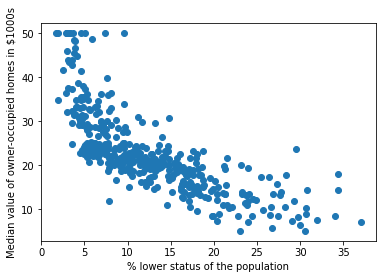

In [49]:
plt.scatter(features_train[:,12], target_train)
plt.xlabel('% lower status of the population')
plt.ylabel('Median value of owner-occupied homes in $1000s')

The relationship appears to have a general linear trend, trending downward. Where the higher the % of lower status of the population the lower the housing value.

**4) With LSTAT as X and MEDV as y, create and fit() an sklearn.linear_model.LinearRegression model. Using the coef_ and intercept_ attributes of the model, what is the equation for MEDV as a linear function of LSTAT?**

In [50]:
lstat_model = sklearn.linear_model.LinearRegression().fit(features_train[:,12].reshape((-1,1)), target_train)

print(lstat_model.coef_)
print(lstat_model.intercept_)

[-0.98093888]
34.991133021969475


MEDV = 34.991133021969475 + (0.98093888)*LSTAT

**5) Use the coef_ and intercept_ attributes of the model to add a line representing the least squares fit to your scatter plot from experiment (3).**

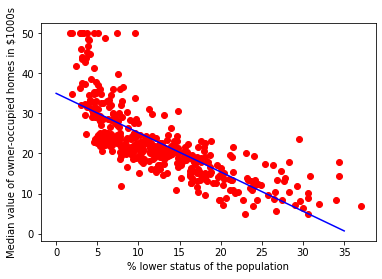

In [51]:
testx = np.arange(0, 35, 0.005)
testt = (testx*lstat_model.coef_ + lstat_model.intercept_)
plt.figure()
plt.xlabel('% lower status of the population')
plt.ylabel('Median value of owner-occupied homes in $1000s')
plt.plot(features_train[:,12],target_train,'ro')
plt.plot(testx, testt, 'b')

**How well does the model appear to fit the training data??**

The model appears to fit the model somewhat well, it follows the general trendline up until about x = 30, afterwards it appears to stray away from the training data.


**6) Use the predict() method of the model to find the response for each value of the LSTAT attribute in the training set. Using sklearn.metrics.mean_squared_error(), find the average loss 𝓛 for the training set.**

In [52]:
mse_train_12 = sklearn.metrics.mean_squared_error(target_train, lstat_model.predict(features_train[:,12].reshape((-1,1))))
print(mse_train_12)

38.47893344802523


**7) Repeat experiment (6) for the test set. How do the training and test MSE values compare?**

In [53]:
mse_test_12 = sklearn.metrics.mean_squared_error(target_test, lstat_model.predict(features_test[:,12].reshape((-1,1))))
print(mse_test_12)

38.75054664279498


The training mse is only slightly lower than that of the test mse. It is expected that the training MSE be lower due to the fact that the model was trained on this data.

**8) Let’s see if we can fit the data better with a more flexible model. Use np.hstack() to add a degree-2 polynomial feature to X, then fit a new linear model. How do the training and test MSE values for this model compare to the previous model?**

In [54]:
poly_features_train = np.hstack((features_train, features_train**2))
poly_features_test = np.hstack((features_test, features_test**2))

poly_lstat_train = poly_features_train[:, (12,25)]
poly_lstat_test = poly_features_test[:, (12,25)]

poly_lstat_model = sklearn.linear_model.LinearRegression().fit(poly_lstat_train, target_train)

poly_lstat_mse_train = sklearn.metrics.mean_squared_error(target_train,poly_lstat_model.predict(poly_lstat_train))
poly_lstat_mse_test = sklearn.metrics.mean_squared_error(target_test,poly_lstat_model.predict(poly_lstat_test))

print(poly_lstat_mse_train)
print(poly_lstat_mse_test)


30.59851434937097
29.297124138279113


Both the MSE train and MSE test for the degree-2 polynomial model are lower than that of the model without the degree-2 polynomial. This shows that the data fits better with a degree-2 polynomial feature added.

**9) Repeat experiment (5) for your polynomial model.**

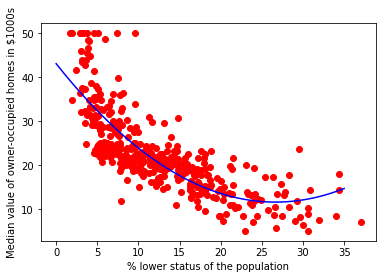

In [55]:
testx = np.arange(0, 35, 0.005)
testt = (testx*poly_lstat_model.coef_[0] + (testx**2)*poly_lstat_model.coef_[1] + poly_lstat_model.intercept_)
plt.figure()
plt.xlabel('% lower status of the population')
plt.ylabel('Median value of owner-occupied homes in $1000s')
plt.plot(features_train[:,12],target_train,'ro')
plt.plot(testx, testt, 'b')

**10)Repeat experiments (4), (6), and (7) using all 13 input features as X. How do the training and test MSEs for this model (which is a linear model including all features) compare to the values you found for experiment (8) (which was a degree-2 polynomial model including a single feature)? What accounts for the difference?**

**10-4)

In [56]:
full_model = sklearn.linear_model.LinearRegression().fit(features_train, target_train)

print(full_model.coef_)
print(full_model.intercept_)

[-1.19721961e-01  5.29635924e-02  5.16150347e-02  2.55847703e+00
 -1.72524020e+01  4.08697043e+00 -4.64415129e-03 -1.52421308e+00
  2.99638323e-01 -1.37152390e-02 -8.48912621e-01  6.56971068e-03
 -5.33276034e-01]
34.33727849058851


New formula for MEDV based on model using all features:

MEDV = 34.33727849058851 + (-1.19721961e-01) * CRIM + (5.29635924e-02) * ZN + (5.16150347e-02) * INDUS + (2.55847703e+00) * CHAS + (-1.72524020e+01) * NOX + (4.08697043e+00) * RM + (-4.64415129e-03) * AGE + (-1.52421308e+00) * DIS + (2.99638323e-0) * RAD + (-1.37152390e-02) * TAX + (-8.48912621e-01) * PTRATIO + (6.56971068e-03) * B + (-5.33276034e-01) * LSTAT

**10-6)**


In [57]:
full_mse_train = sklearn.metrics.mean_squared_error(target_train, full_model.predict(features_train))
print(full_mse_train)

21.046340805342368


**10-7)**

In [58]:
full_mse_test = sklearn.metrics.mean_squared_error(target_test, full_model.predict(features_test))
print(full_mse_test)

25.976408935996655


The training and testing MSE of the model using all 13 features is lower than that of the model in experiment 8, which was only using the LSTAT value with a degree-2 polynomial. This information shows that a model utilizing all 13 features with a linear model is more accurate at predicting values than a model that uses only the LSTAT feature with a degree-2 polynomial. 

**11) Combine experiments (8) and (10), using np.hstack() to add the squares of all 13 input features to X. How do this model’s training and test MSE scores compare to the previous model using all 13 features?**

In [59]:
poly_full_model = sklearn.linear_model.LinearRegression().fit(poly_features_train, target_train)

mse_train_poly = sklearn.metrics.mean_squared_error(target_train, poly_full_model.predict(poly_features_train))
print(mse_train_poly)

mse_test_poly = sklearn.metrics.mean_squared_error(target_test, poly_full_model.predict(poly_features_test))
print(mse_test_poly)

13.508100802461714
17.85789609301442


The model using the degree 2 polynomial and all 13 features had MSE train of 13.508100802461714 and MSE test of 17.85789609301442. Both of these scores are lower than the model using all 13 features without the second degree polynomial. This shows that our data fits more accurately to a second degree polynomial model rather than just a linear model.